# The Hall Effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression
from scipy import optimize
import pandas as pd

In [2]:
data = pd.read_csv("MagneticCurrent.csv")
data2 = pd.read_csv("mc.csv")

In [3]:
data

,magnet current,hall voltage,B field
0,0.05,-37.5900,0.01120
1,0.10,-35.5280,0.02240
2,0.15,-33.6760,0.03360
3,0.20,-31.9170,0.04480
4,0.25,-30.1200,0.05600
5,0.30,-28.2000,0.06720
6,0.35,-26.2000,0.07840
7,0.40,-24.4740,0.08960
8,0.45,-22.4200,0.10080
9,0.50,-20.5820,0.11200


In [4]:
data2

,thermocouple K,thermocouple `C,Hall voltage,current applied to crystal,supply Voltage,Resistance,Crystal Voltage
0,382.456,109.306,-19.520,4.1,1.230,0.246000,5.00
1,380.746,107.596,-18.782,4.0,1.450,0.295918,4.90
2,371.962,98.812,-21.935,3.8,1.570,0.334043,4.70
3,364.141,90.991,-25.356,3.6,1.705,0.378889,4.50
4,354.898,81.748,-27.490,3.4,2.440,0.567442,4.30
5,345.277,72.127,-27.446,3.2,2.970,0.724390,4.10
6,340.696,67.546,-24.915,3.0,3.720,0.930000,4.00
7,334.245,61.095,-21.579,2.8,4.875,1.282895,3.80
8,328.707,55.557,-17.776,2.6,4.921,1.892692,2.60
9,315.627,42.477,-9.240,2.4,5.204,2.159336,2.41


In [5]:
o = data2['Resistance'] * data2['current applied to crystal']
o

0     1.008600
1     1.183673
2     1.269362
3     1.364000
4     1.929302
5     2.318049
6     2.790000
7     3.592105
8     4.921000
9     5.182407
10    5.243000
11    4.581818
12    4.158857
13    3.970526
14    3.489111
15    3.229500
16    2.740000
17    3.264800
18    4.680000
19    7.698000
dtype: float64

## Define Function to be optimized

In [6]:
def test_func(x, a, b):
    return (a*x)+b

## Optimize the functions, and plot

Text(0.5,1,'Voltage vs Magnet Current')

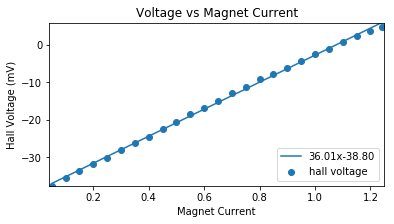

In [7]:
%matplotlib inline
fig = plt.figure(0, figsize=(6, 3))
x = data['magnet current']
y = data['hall voltage']
params1, params_covariance = optimize.curve_fit(test_func, x, y)
gs = gridspec.GridSpec(5, 4)
ax1 = plt.subplot(gs[0:, 0:])
p1 = test_func(x, *params1)
ax1.scatter(x, y)
ax1.plot(x, p1, label =  "{:.2f}".format(params1[0])+'x' + "{:.2f}".format(params1[1]))
ax1.legend(loc='lower right')
ax1.margins(0)
plt.ylabel("Hall Voltage (mV)")
plt.xlabel("Magnet Current")
plt.title("Voltage vs Magnet Current")


In [8]:
R = (((params1[0]) * 1e-3)/2.5)
R

0.014404855091171115

In [9]:
((1.5e-2-R)/1.5e-2)*100

3.967632725525895

Text(0.5,1,'Temperature vs Hall Voltage')

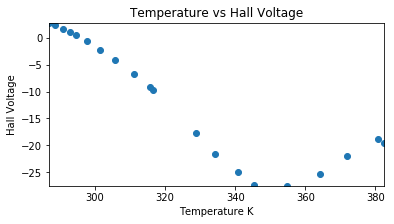

In [10]:
%matplotlib inline
fig = plt.figure(0, figsize=(6, 3))
x = data2['thermocouple K'].values
y = data2['Hall voltage'].values
ax1 = plt.subplot(gs[0:, 0:])
ax1.scatter(x, y)
#ax1.legend(loc='upper right')
ax1.margins(0)
plt.ylabel("Hall Voltage")
plt.xlabel("Temperature K")
plt.title("Temperature vs Hall Voltage")

Text(0.5,1,'Temperature vs Resistance')

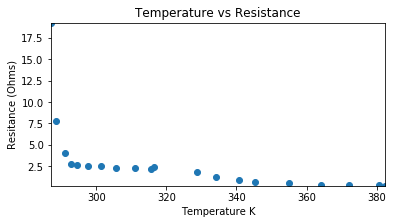

In [11]:
%matplotlib inline
fig = plt.figure(0, figsize=(6, 3))
x = data2['thermocouple K'].values
y = data2['Resistance'].values
ax1 = plt.subplot(gs[0:, 0:])
ax1.scatter(x, y)
#ax1.legend(loc='upper right')
ax1.margins(0)
plt.ylabel("Resitance (Ohms)")
plt.xlabel("Temperature K")
plt.title("Temperature vs Resistance")

Text(0.5,1,'Inverse Temperature vs Ln(1/Resistance)')

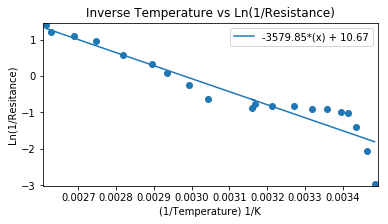

In [12]:
%matplotlib inline
fig = plt.figure(1, figsize=(6, 3))
x = 1/data2['thermocouple K'].values
y = np.log(1/data2['Resistance'].values)
params1, params_covariance = optimize.curve_fit(test_func, x, y)
p1 = test_func(x, *params1)
ax1 = plt.subplot(gs[0:, 0:])

ax1.plot(x, p1, label =  "{:.2f}".format(params1[0])+'*(x) + ' + "{:.2f}".format(params1[1]))
ax1.scatter(x, y)
ax1.legend(loc='upper right')
ax1.margins(0)
plt.ylabel("Ln(1/Resitance)")
plt.xlabel("(1/Temperature) 1/K")
plt.title("Inverse Temperature vs Ln(1/Resistance)")

## Boltzman Constant

In [13]:
k = 1.38064852 *1e-23

## Energy Gap energy in electron volts

In [14]:
E = -params1[0]*(2*k) * 6.242e+18
E

0.6170243607138158

In [15]:
((0.62-E)/0.62)*100

0.47994182035228417